# Parcial 2 -  Enunciados

Considere las tres series de tiempo que aparecen en cada una de las hojas de excel del archivo __datos_parcial2.xlsx__.

Importe cada una de las tres series de tiempo y para cada una de ellas resuelva lo siguiente en Python:

1. Realice los gráficos ACF y PACF para tratar de identificar los órdenes $p$, $d$ y $q$ del modelo ARIMA($p$, $d$, $q$). Saque conclusiones argumentando cada una.

2. Aplique la prueba de Dickey-Fuller para ver si es necesario tomar diferencias (valor de $d$). Saque conclusiones argumentando cada una.

3. Si $d\geq 1$ en el item (2), entonces realice nuevamente los gráficos ACF y PACF de la serie diferenciada de orden $d$, esto con el fin de identificar los ordenes $p$ y $q$. Saque conclusiones argumentando cada una.

4. Aplique varios modelos (explicando el por qué aplica cada uno) y use un criterio de selección (AIC, BIC) para seleccionar el "mejor". Saque conclusiones argumentando cada una.

5. Verifique si el "mejor" modelo seleccionado en el item (4) es estacionario e invertible (recuerde usar las funciones __abs__ y __np.roots__ aplicadas a los polinómios estimados por el modelo). Saque conclusiones argumentando cada una.

6. Verifique si existe autocorrelación en los residuales del modelo seleccionado utilizando el gráfico ACF y complementando con la prueba de Ljung-Box (para los primeros 10 lags, es decir, h=10). Saque conclusiones argumentando cada una.

7. Verifique si hay normalidad en los residuales del modelo. Saque conclusiones argumentando cada una.

8. Si todo lo anterior se cumple entonces puede realizar pronósticos con el "mejor" modelo ajustado para los 5 valores futuros. Saque conclusiones argumentando cada una.

En la primera celda del trabajo ubique los nombres de los integrantes del grupo de la siguiente forma:

- __Nombre y cédula del integrante 1 del grupo:__



- __Nombre y cédula del integrante 2 del grupo:__


In [124]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
plt.style.use('fivethirtyeight')

### Base de Datos:

In [13]:
s1 = pd.read_excel("Data/datos_parcial2.xlsx", sheet_name="serie1", parse_dates=["fecha"])
s2 = pd.read_excel("Data/datos_parcial2.xlsx", sheet_name="datos2", parse_dates=["date"])
s3 = pd.read_excel("Data/datos_parcial2.xlsx", sheet_name="tercera", parse_dates=["dia"])

### <center> Serie de tiempo 1

### Breve exploración de la DB:

In [19]:
s1.shape

(231, 2)

In [20]:
s1.dtypes

fecha    datetime64[ns]
valor           float64
dtype: object

In [16]:
s1.head()

,fecha,valor
0,2021-01-01,0.06
1,2021-01-02,0.05
2,2021-01-03,0.05
3,2021-01-04,0.51
4,2021-01-05,2.03


In [17]:
s1.tail()

,fecha,valor
226,2021-08-15,16.90
227,2021-08-16,17.35
228,2021-08-17,18.85
229,2021-08-18,21.40
230,2021-08-19,22.60


#### Grafico de la serie de tiempo:

<AxesSubplot:>

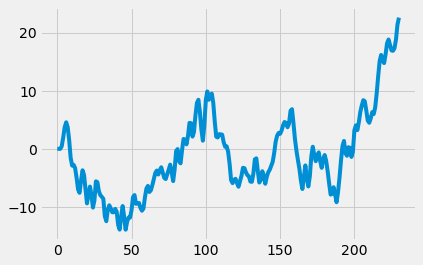

In [89]:
s1.valor.plot()

1. Realice los gráficos ACF y PACF para tratar de identificar los órdenes $p$, $d$ y $q$ del modelo ARIMA($p$, $d$, $q$). Saque conclusiones argumentando cada una.

#### ACF y PACF:

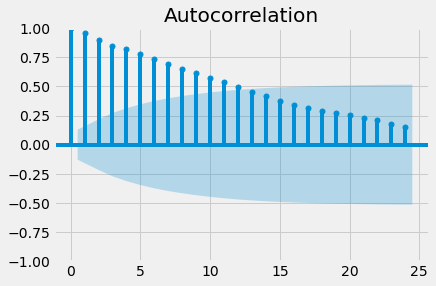

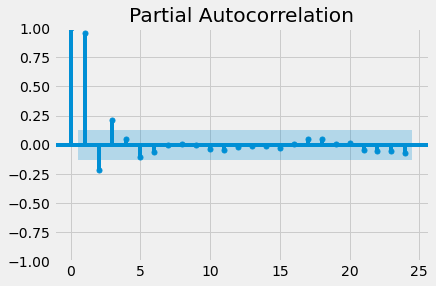

In [90]:
plot_acf(s1.valor.dropna())
plt.show()
plot_pacf(s1.valor.dropna(), method="ywm")
plt.show()

2. Aplique la prueba de Dickey-Fuller para ver si es necesario tomar diferencias (valor de $d$). Saque conclusiones argumentando cada una.


In [101]:
adfuller(s1.valor)

(-0.6940413117038671,
 0.8482869409753928,
 3,
 227,
 {'1%': -3.4594900381360034,
  '5%': -2.8743581895178485,
  '10%': -2.573601605503697},
 618.5147960822515)

3. Si $d\geq 1$ en el item (2), entonces realice nuevamente los gráficos ACF y PACF de la serie diferenciada de orden $d$, esto con el fin de identificar los ordenes $p$ y $q$. Saque conclusiones argumentando cada una.

In [103]:
s1_aux_dif = s1.diff()
s1_aux_dif

,fecha,valor,dia,dia_sem,mes
0,NaT,NaN,NaN,NaN,NaN
1,1 days,-0.01,1.0,1.0,0.0
2,1 days,0.00,1.0,1.0,0.0
3,1 days,0.46,1.0,-6.0,0.0
4,1 days,1.52,1.0,1.0,0.0
...,...,...,...,...,...
226,1 days,-0.06,1.0,1.0,0.0
227,1 days,0.45,1.0,-6.0,0.0
228,1 days,1.50,1.0,1.0,0.0
229,1 days,2.55,1.0,1.0,0.0


<AxesSubplot:>

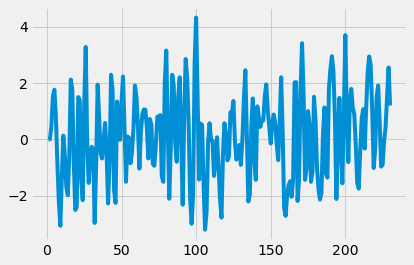

In [108]:
s1_aux_dif.valor.plot()

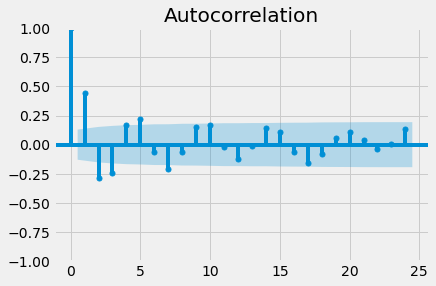

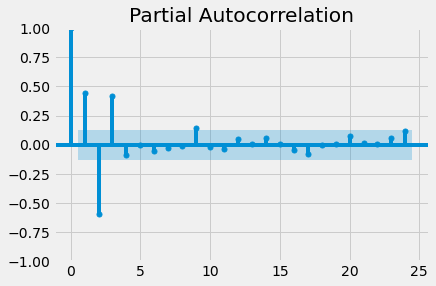

In [106]:
plot_acf(s1_aux_dif.valor.dropna())
plt.show()
plot_pacf(s1_aux_dif.valor.dropna(), method="ywm")
plt.show()

4. Aplique varios modelos (explicando el por qué aplica cada uno) y use un criterio de selección (AIC, BIC) para seleccionar el "mejor". Saque conclusiones argumentando cada una.


In [112]:
model1 = ARIMA(s1.valor, order=(0, 1, 5)).fit()
model2 = ARIMA(s1.valor, order=(3, 1, 5)).fit()
model3 = ARIMA(s1.valor, order=(3, 1, 0)).fit()

In [113]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  valor   No. Observations:                  231
Model:                 ARIMA(0, 1, 5)   Log Likelihood                -327.427
Date:                Sat, 01 Oct 2022   AIC                            666.854
Time:                        19:36:12   BIC                            687.482
Sample:                             0   HQIC                           675.175
                                - 231                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.9694      0.068     14.169      0.000       0.835       1.104
ma.L2          0.0230      0.092      0.250      0.803      -0.158       0.204
ma.L3         -0.4066      0.086     -4.732      0.000      -0.575      -0.238
ma.L4         -0.0947      0.090     -1.051      0.293      -0.271       0.082
ma.L5          0.1446      0.065      2.225      0.026       0.017       0.272
sigma2         1.0024      0.105      9.566      0.000       0.797       1.208
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):                 2.07
Prob(Q):                              0.73   Prob(JB):                         0.36
Heteroskedasticity (H):               1.17   Skew:                             0.14
Prob(H) (two-sided):                  0.50   Kurtosis:                         2.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [114]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  valor   No. Observations:                  231
Model:                 ARIMA(3, 1, 5)   Log Likelihood                -322.878
Date:                Sat, 01 Oct 2022   AIC                            663.757
Time:                        19:36:49   BIC                            694.700
Sample:                             0   HQIC                           676.239
                                - 231                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0208      0.701      0.030      0.976      -1.353       1.395
ar.L2         -0.5338      0.223     -2.390      0.017      -0.972      -0.096
ar.L3         -0.2630      0.519     -0.506      0.613      -1.281       0.755
ma.L1          0.9757      0.697      1.401      0.161      -0.390       2.341
ma.L2          0.5481      0.532      1.031      0.303      -0.494       1.590
ma.L3          0.4011      0.371      1.082      0.279      -0.326       1.128
ma.L4          0.2919      0.246      1.185      0.236      -0.191       0.775
ma.L5          0.1508      0.103      1.464      0.143      -0.051       0.353
sigma2         0.9628      0.100      9.586      0.000       0.766       1.160
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.31
Prob(Q):                              0.95   Prob(JB):                         0.52
Heteroskedasticity (H):               1.18   Skew:                             0.10
Prob(H) (two-sided):                  0.47   Kurtosis:                         2.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [115]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  valor   No. Observations:                  231
Model:                 ARIMA(3, 1, 0)   Log Likelihood                -324.862
Date:                Sat, 01 Oct 2022   AIC                            657.723
Time:                        19:37:18   BIC                            671.475
Sample:                             0   HQIC                           663.270
                                - 231                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9507      0.059     16.213      0.000       0.836       1.066
ar.L2         -0.8858      0.065    -13.691      0.000      -1.013      -0.759
ar.L3          0.4167      0.060      6.920      0.000       0.299       0.535
sigma2         0.9800      0.103      9.481      0.000       0.777       1.183
===================================================================================
Ljung-Box (L1) (Q):                   0.33   Jarque-Bera (JB):                 1.59
Prob(Q):                              0.56   Prob(JB):                         0.45
Heteroskedasticity (H):               1.21   Skew:                             0.07
Prob(H) (two-sided):                  0.40   Kurtosis:                         2.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [121]:
print("AIC")
print(model1.aic, model2.aic, model3.aic)
print("BIC")
print(model1.bic, model2.bic, model3.bic)

AIC
666.8536978819373 663.7568628139754 657.7230431825426
BIC
687.4821737354764 694.6995765942842 671.4753604182354


In [122]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  valor   No. Observations:                  231
Model:                 ARIMA(3, 1, 5)   Log Likelihood                -322.878
Date:                Sat, 01 Oct 2022   AIC                            663.757
Time:                        19:51:09   BIC                            694.700
Sample:                             0   HQIC                           676.239
                                - 231                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0208      0.701      0.030      0.976      -1.353       1.395
ar.L2         -0.5338      0.223     -2.390      0.017      -0.972      -0.096
ar.L3         -0.2630      0.519     -0.506      0.613      -1.281       0.755
ma.L1          0.9757      0.697      1.401      0.161      -0.390       2.341
ma.L2          0.5481      0.532      1.031      0.303      -0.494       1.590
ma.L3          0.4011      0.371      1.082      0.279      -0.326       1.128
ma.L4          0.2919      0.246      1.185      0.236      -0.191       0.775
ma.L5          0.1508      0.103      1.464      0.143      -0.051       0.353
sigma2         0.9628      0.100      9.586      0.000       0.766       1.160
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.31
Prob(Q):                              0.95   Prob(JB):                         0.52
Heteroskedasticity (H):               1.18   Skew:                             0.10
Prob(H) (two-sided):                  0.47   Kurtosis:                         2.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

5. Verifique si el "mejor" modelo seleccionado en el item (4) es estacionario e invertible (recuerde usar las funciones __abs__ y __np.roots__ aplicadas a los polinómios estimados por el modelo). Saque conclusiones argumentando cada una.

6. Verifique si existe autocorrelación en los residuales del modelo seleccionado utilizando el gráfico ACF y complementando con la prueba de Ljung-Box (para los primeros 10 lags, es decir, h=10). Saque conclusiones argumentando cada una.


In [125]:
sm.stats.acorr_ljungbox(model2.resid, lags=10, return_df=True)

,lb_stat,lb_pvalue
1,0.002980,0.956467
2,0.111333,0.945855
3,0.152233,0.984905
4,0.287751,0.990591
5,0.566897,0.989469
6,0.967480,0.986815
7,1.109452,0.992865
8,1.133216,0.997259
9,1.360112,0.998058
10,3.597811,0.963672


7. Verifique si hay normalidad en los residuales del modelo. Saque conclusiones argumentando cada una.

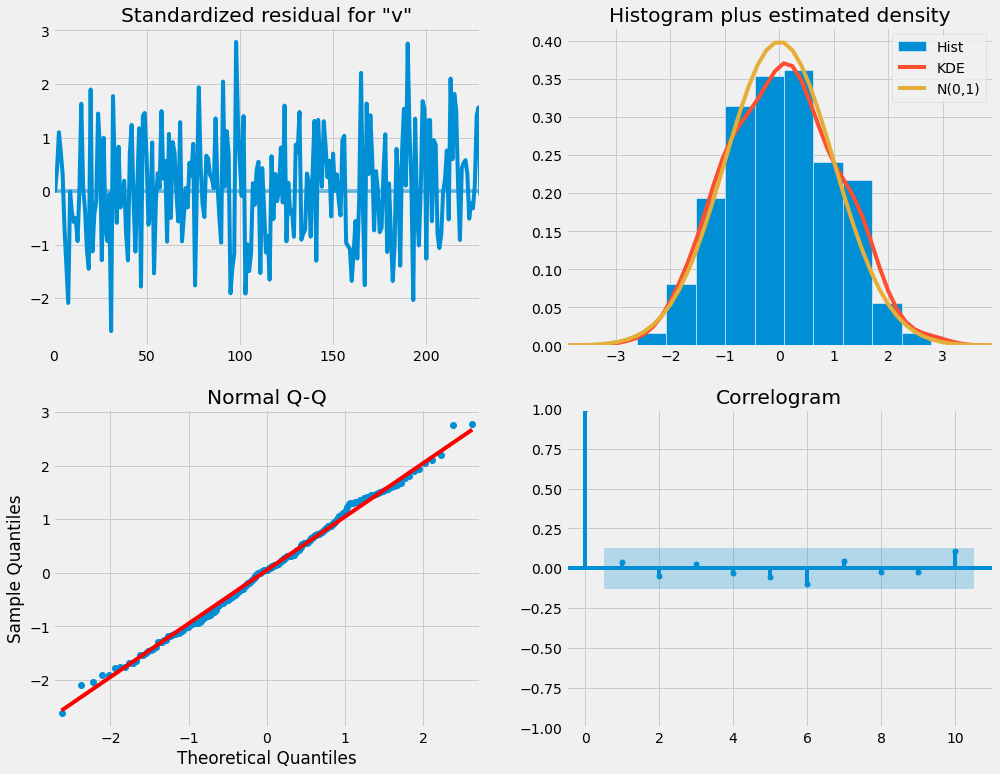

In [126]:
model3.plot_diagnostics(figsize=(15,12))
plt.show()

8. Si todo lo anterior se cumple entonces puede realizar pronósticos con el "mejor" modelo ajustado para los 5 valores futuros. Saque conclusiones argumentando cada una.

In [127]:
s1

,fecha,valor,dia,dia_sem,mes
0,2021-01-01,0.06,1,4,1
1,2021-01-02,0.05,2,5,1
2,2021-01-03,0.05,3,6,1
3,2021-01-04,0.51,4,0,1
4,2021-01-05,2.03,5,1,1
...,...,...,...,...,...
226,2021-08-15,16.90,15,6,8
227,2021-08-16,17.35,16,0,8
228,2021-08-17,18.85,17,1,8
229,2021-08-18,21.40,18,2,8


In [134]:
fore = model2.get_forecast(5)
fore_ci = fore.conf_int()
fore_ci

,lower valor,upper valor
231,20.217383,24.063635
232,17.500922,26.089193
233,16.518090,28.128982
234,16.221662,29.432660
235,15.303916,29.945976


In [136]:
fore.predicted_mean

231    22.140509
232    21.795058
233    22.323536
234    22.827161
235    22.624946
Name: predicted_mean, dtype: float64

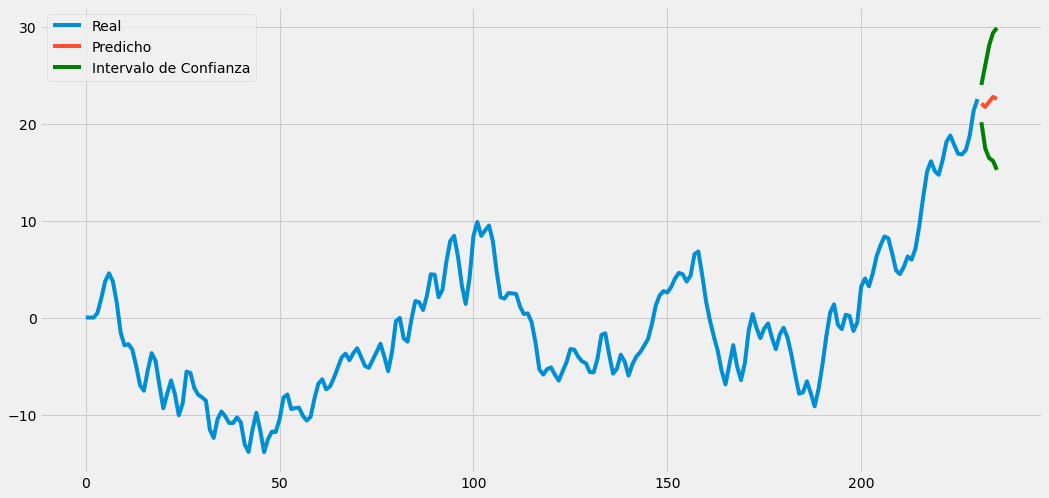

In [137]:
plt.figure(figsize=(16,8))  #  Graficamos:
s1.valor.plot()
fore.predicted_mean.plot()
fore_ci.iloc[:,0].plot(color="green")
fore_ci.iloc[:,1].plot(color="green")
plt.legend(["Real", "Predicho", "Intervalo de Confianza"])